In [21]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
#using seaborn default features
import seaborn as sns
sns.set()

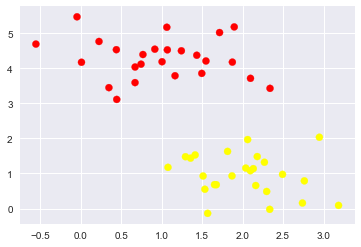

In [23]:
from sklearn.datasets.samples_generator import make_blobs
X ,y = make_blobs(n_samples=50, centers=2,
                random_state=0, cluster_std=0.60)
plt.scatter(X[:,0], X[:,1] , c=y,s=50,cmap = 'autumn');

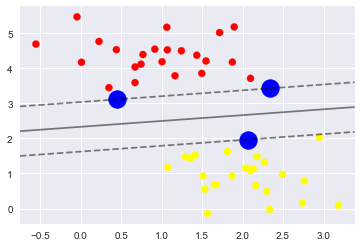

In [24]:
#support vector classifier
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1E10)
model.fit(X,y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """plot decision functions for a 2d svc"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
        
   #create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    p = model.decision_function(xy).reshape(X.shape)
        
        
   # plot decision boundary and margins
    ax.contour(X,Y,p,colors='k',
                  levels=[-1,0,1],alpha=0.5,
                  linestyles=['--','-','--'])
        
        #plot support vectors
        
    if plot_support:  
        ax.scatter(model.support_vectors_[:, 0],
                      model.support_vectors_[:, 1],
                      s=300,linewidth=1,facecolor='blue');
            
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
            
plt.scatter(X[:, 0],X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Text(0.5,1,'N = 60')

Text(0.5,1,'N = 120')

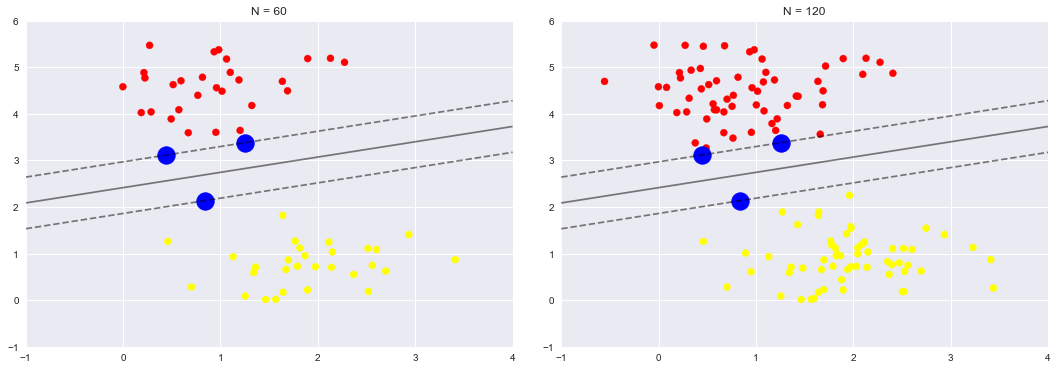

In [31]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [33]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

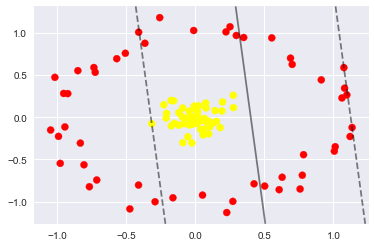

In [34]:
#handling Non linear data 
from sklearn.datasets.samples_generator import make_circles
X,y = make_circles(100,factor=.1,noise=.1)
clf = SVC(kernel='linear').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(clf,plot_support=False)
#you see that linear svm not handle non-linear data 

In [37]:
#In this i will show you how svm handle non-linear data using 3d visualization
r = np.exp(-(X**2).sum(1))
from mpl_toolkits import mplot3d

def plot_3D(elev=30,azim=30,X=X,y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='autumn')
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
interact(plot_3D, elev=[0,20,40,90], azip=(-180,180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(0, 20, 40, 90), value=0), IntSlider(value=30, desc…

In [39]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

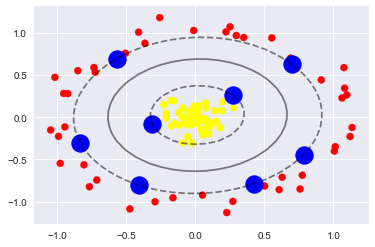

In [40]:
#Handle non linear data using kernel
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

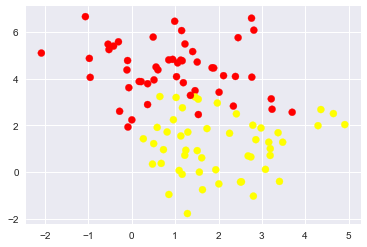

In [41]:
# handling slack variable in SVM
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Text(0.5,1,'C = 10.0')

Text(0.5,1,'C = 0.1')

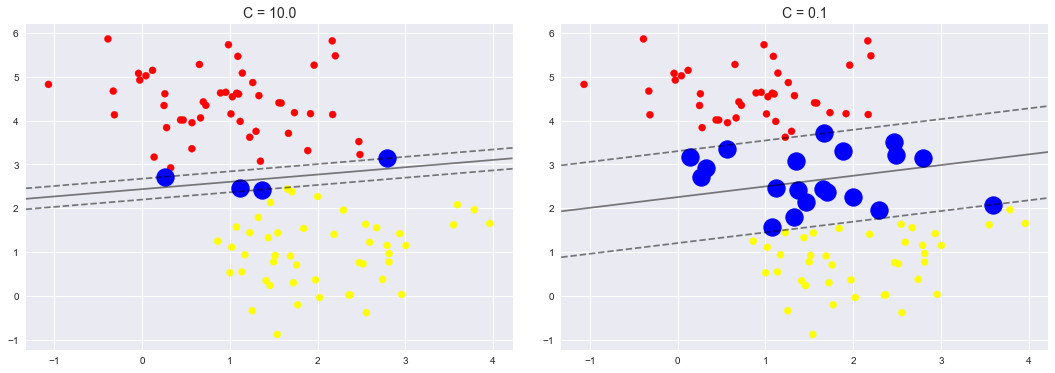

In [42]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)